# Task 2 :- Prediction of percentage of marks that a student is expected to score based upon the number of hours they studied
 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
student_score = pd.read_csv(url)
print("Data imported successfully")
student_score.head(30)# there is only 24 rows that it showed us  

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# to get the information of data set
student_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# description of the dataset
student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


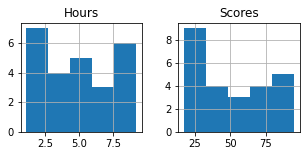

In [5]:
# Plotting the distribution of scores to show the relationship between hours and scores
student_score.hist(bins=5 , figsize=(5,2))
plt.show()

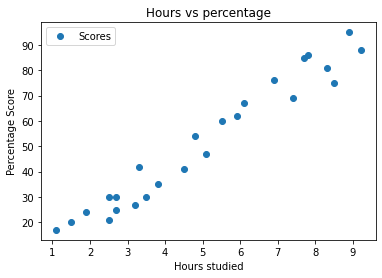

In [6]:
# here we will plot the scatter plot to get better idea 
student_score.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs percentage")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
x = student_score.iloc[:, :-1].values 
y= student_score.iloc[: , 1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [9]:
# to check how data set is split into train and test set
print(f"Rows in train set: {len(x_train)}\nRows in test set :{len(x_test)}\n")

Rows in train set: 20
Rows in test set :5



## Now training the model 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("task completed.")

task completed.


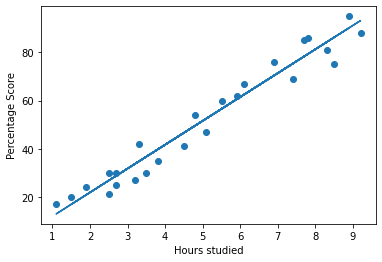

In [11]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')  
plt.show()

In [12]:
print(x_test) 
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


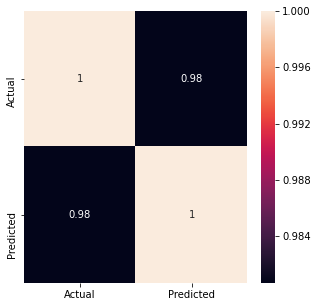

In [16]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [20]:
hours = np.array([1])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 1.0
Predicted Score = 11.93


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
